In [5]:
# prompt: import gld_price_data and import numpy pandas

import numpy as np
import pandas as pd

# Assuming you have a file named 'gld_price_data.csv' or similar
# Replace 'gld_price_data.csv' with your actual file name
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [6]:
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
gold_data= gold_data.drop(['Date'],axis=1)
gold_data

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


In [11]:
#positive correlation
#negative correlation
correlation=gold_data.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


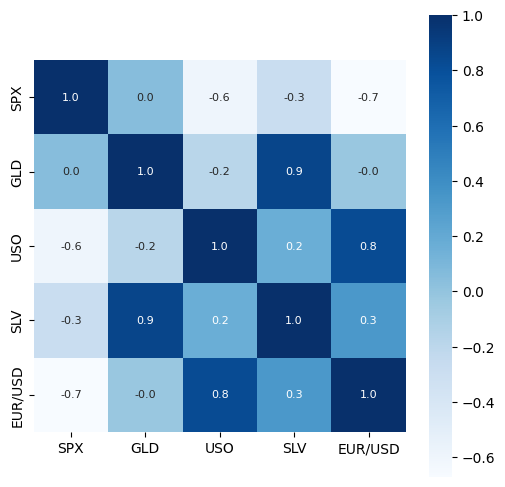

In [12]:
# prompt: import sns
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
plt.show()

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

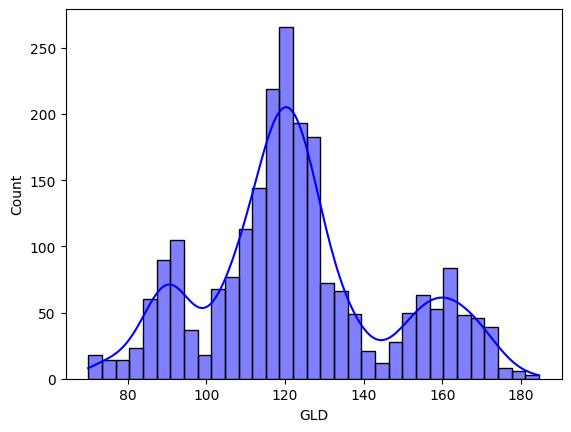

In [14]:
#checking the distribution of GLD price
sns.histplot(gold_data['GLD'],color='blue',kde=True)

In [15]:
# prompt: split the features X = gold_data.drop([Date,GLD])  and Y= gold_data["GLD"]

X = gold_data.drop(['GLD'], axis=1)
Y = gold_data['GLD']

In [16]:
X


,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [17]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


In [18]:
# prompt: train and test the x and y

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [25]:
# prompt: now apply best algo

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

regressor = RandomForestRegressor(n_estimators=100, random_state=2)
regressor.fit(X_train, Y_train)


RandomForestRegressor(random_state=2)

In [27]:

# Prediction on Test Data
test_data_prediction = regressor.predict(X_test)


print(test_data_prediction)


[168.11379932  82.23519965 116.22490032 127.70480079 120.65890158
 154.78889721 149.69589755 126.12270048 117.41669876 126.11890066
 116.90020126 171.56690077 141.86319844 167.79489879 115.18020028
 117.81960059 139.20070298 170.28390114 159.17470285 158.59569966
 155.07480021 125.23220003 176.43619959 156.89410326 125.24900038
  93.86899998  76.93210017 120.74380005 119.12259955 167.61919981
  88.18580007 125.26050004  91.07990071 117.57250049 121.07749913
 136.55970098 115.53570086 115.39860083 148.97049957 107.18050102
 104.19980257  87.24959778 126.5021005  118.20639983 153.41749912
 119.73489967 108.46519982 108.01749814  92.99170026 127.27349752
  75.56760045 113.79569945 121.32939993 111.31929935 118.86579891
 120.89249961 158.77939994 168.49440108 147.09019666  85.77549852
  94.23570036  86.7967992   90.46990009 119.01700073 126.45980073
 127.62500019 170.14950032 122.25569933 117.49489887  98.44850012
 167.97310066 142.75829825 131.95160314 121.0854019  121.10159948
 119.84490

In [28]:
#lets compare predicted value and actual value of test datas
#R squared error
error_score = r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)


R squared error :  0.9884562581856317


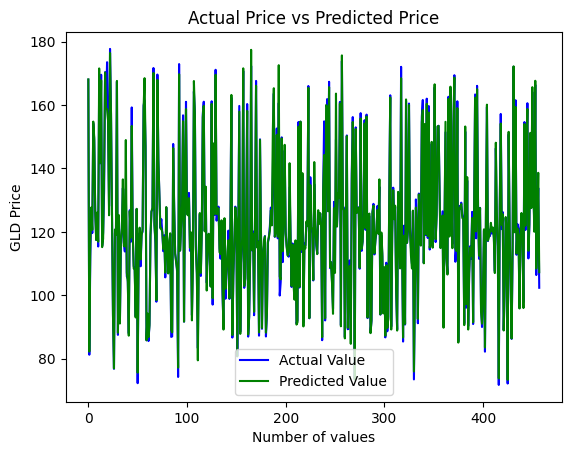

In [29]:
# Compare the Actual Values and Predicted Values in a Plot
Y_test = list(Y_test)
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()